# Basic Natural Language Processing - NLP tasks with NLTK
This notebook contains a summary and examples of the corresponding chapter of the course "Applied Text Mining with Python".
Link to the course overview: https://www.coursera.org/learn/python-text-mining

Link to the chapter video: https://www.coursera.org/lecture/python-text-mining/basic-nlp-tasks-with-nltk-KD8uN

In particular, we will explore text corpora provided by the ntlk package (e.g. Wall Street Journal text corpus), and perform some tasks on them providing us insights (e.g. determining word frequency).

We will start the exploration by importing the needed packages, downloading a text corpus and transforming / analyzing it.

When downloading the book library, the "NLTK Downloader" opens to manage the download of the components. A click on "Download" triggers the component download.
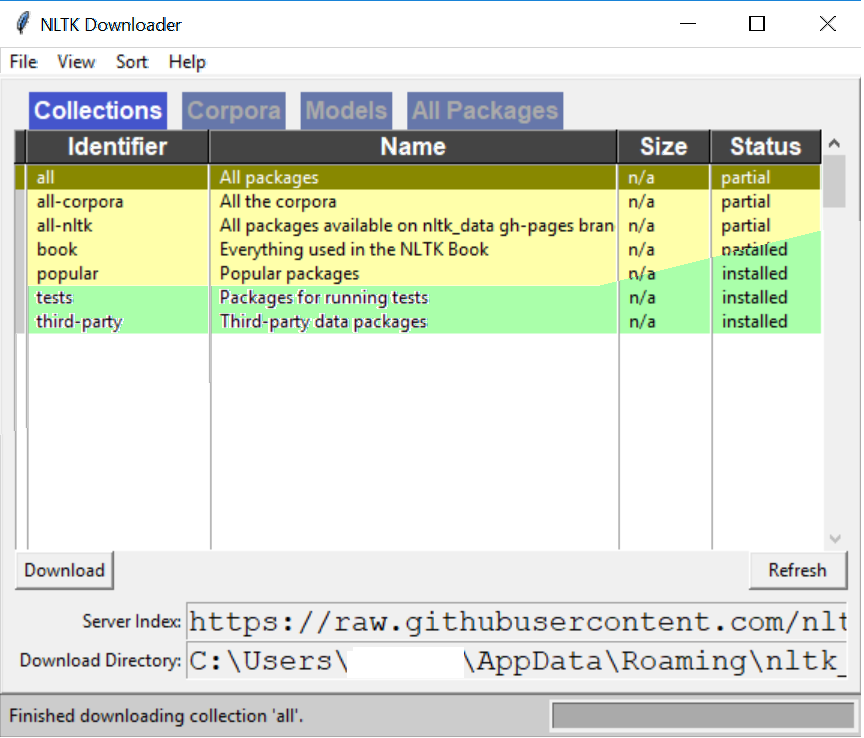

In [71]:
from nltk import book, corpus
from nltk.book import text7

"""
# In order to learn how to work with book objects from nltk,
# check documentation http://www.nltk.org/_modules/nltk/text.html
# for keyword "class Text(object):"
concordance(self, word, width=79, lines=25):
concordance_list(self, word, width=79, lines=25):
# Prints a concordance for ``word`` with the specified context window. Word matching is not case-sensitive.
collocations(self, num=20, window_size=2):
# Print collocations derived from the text, ignoring stopwords.
count(self, word):
# Count the number of times this word appears in the text.
similar(self, word, num=20):
# Distributional similarity: find other words which appear in the
# same contexts as the specified word; list most similar words first.
"""

#text7.count('and')
#text7.concordance('Germany')
#text7.similar('cost')
# List of unique words:
set(text7)
# Number of unique words:
len(set(text7))
# Frequency of words:
from nltk import FreqDist
dist = FreqDist(text7)
len(dist)
# Let's see the actual words in dist:
vocabl = dist.keys()
vocabl_list = list(vocabl)
vocabl_list[:10]
# Let's look at the most frequent words in the corpus:
#freqwords = [w for w in vocabl_list if len(w)>5 and vocabl_list(w) > 100]

['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board']

## Basic text exploration: word frequency

As a first step, we'll put the whole text7 to lowercase, because (at least in English language) we can leave the cases out of consideration (at least for now).

In [72]:
text7 = [w.lower() for w in text7]
text7[0:10]

['pierre', 'vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the']

For getting a list (without duplicates) of all words that occur in the book object, use this command:

In [73]:
set(text7)

{'shugart',
 'significant',
 'gulf',
 'filters',
 'vital',
 'treat',
 'focused',
 '7.52',
 'precious',
 'slowly',
 'lowered',
 'belongs',
 '*t*-116',
 'assembled',
 'defined',
 'involves',
 'farren',
 'wound',
 'behest',
 'withdrawal',
 'test-practice',
 '94.8',
 'mortgage-backed',
 'jacobs',
 'leveraged',
 'bunny',
 'interviewed',
 'kit',
 'owners',
 'accepting',
 '8.22',
 'loudest',
 'confined',
 'resumes',
 '0.7',
 'milwaukee',
 'motor-home',
 '5.8',
 'if',
 'seconds',
 'day',
 'totally',
 'nobel',
 'understood',
 'ftc',
 'truth-in-lending',
 'berliner',
 'white',
 'scans',
 'j.',
 'his',
 'tentatively',
 'event',
 'controversial',
 'understand',
 'incorporated',
 'mont',
 'loans',
 'averaged',
 'boosting',
 'goodies',
 'buckle',
 'impudent',
 'handelsbanken',
 'sulfur-dioxide',
 '12.97',
 'escrow',
 'applaud',
 'tackle',
 'proper',
 'benefits',
 'busiest',
 'fashion',
 'columbus',
 '99',
 'roof-crush',
 'shopping',
 'vehicles',
 'supercomputer',
 'birds',
 'good',
 'suggests',
 'hu

The number of unique words can be obtained by calculating the length of the set of unique words:

In [74]:
len(set(text7))

11387

For analyzing a text, knowing which words occur how often is often a helpful first step. The FreqDist class of the nltk probability class provides functionality for computing these values. We can create a FreqDist object and
- convert it to a dict to
    - access its keys directly
- convert the dict then to a Pandas dataframe to
    - order it by keys or values

Documentation here:
- on FreqDist: http://www.nltk.org/api/nltk.html?highlight=freqdist
- on creating dataframes from dicts: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html

Create FreqDist object and
- convert it to a dict to
    - access its keys directly

It makes sense to filter out "typical", not context-related words, so-called "stopwords". NLTK provides a list of these words.

In [75]:
from nltk.corpus import stopwords
stopwords.fileids() #gives a list of languages that have available stopword lists
sw = stopwords.words("english")
# removing stop words from wordList
wordsList = text7
wordsList = [w for w in wordsList if not w in sw]

print ("Comparison: Number of words in")
print ("original 'text7': ", len(text7))
print ("filtered wordsList': ", len(wordsList))

Comparison: Number of words in
original 'text7':  100676
filtered wordsList':  70190


In [76]:
from nltk import FreqDist
dist = FreqDist(wordsList)
dict_dist = dict(dist)
dict_dist

{'pierre': 1,
 'vinken': 2,
 ',': 4885,
 '61': 5,
 'years': 115,
 'old': 32,
 'join': 4,
 'board': 73,
 'nonexecutive': 5,
 'director': 32,
 'nov.': 24,
 '29': 5,
 '.': 3828,
 'mr.': 375,
 'chairman': 57,
 'elsevier': 1,
 'n.v.': 3,
 'dutch': 3,
 'publishing': 18,
 'group': 69,
 'rudolph': 3,
 'agnew': 1,
 '55': 10,
 'former': 19,
 'consolidated': 2,
 'gold': 11,
 'fields': 13,
 'plc': 13,
 'named': 23,
 '*-1': 1123,
 'british': 11,
 'industrial': 25,
 'conglomerate': 3,
 'form': 18,
 'asbestos': 11,
 'used': 33,
 '*': 965,
 'make': 74,
 'kent': 8,
 'cigarette': 4,
 'filters': 7,
 'caused': 13,
 'high': 52,
 'percentage': 11,
 'cancer': 9,
 'deaths': 6,
 'among': 44,
 'workers': 22,
 'exposed': 2,
 '30': 47,
 'ago': 38,
 'researchers': 14,
 'reported': 37,
 '0': 1099,
 '*t*-1': 806,
 'fiber': 1,
 'crocidolite': 5,
 'unusually': 2,
 'resilient': 1,
 'enters': 4,
 'lungs': 1,
 'even': 76,
 'brief': 5,
 'exposures': 3,
 'causing': 5,
 'symptoms': 1,
 'show': 14,
 'decades': 3,
 'later': 1

- convert the dict then to a Pandas dataframe to
    - order it by keys or values
    
Documentation for dataframe sort_values: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

In [77]:
import pandas as pd
df_dist = pd.DataFrame.from_dict(dict_dist, orient='index', columns=['occurrences'])
df_dist = df_dist.sort_values(by=['occurrences'], ascending = False)
df_dist[:10]

,occurrences
",",4885
.,3828
*-1,1123
0,1099
*,965
's,865
*t*-1,806
*u*,744
$,718
``,702


Let's better look at "real" words > 4 letters. To do this, we can use the [filter method for DataFrames](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.filter.html).A regex expression ([a good cheatsheet here](https://www.rexegg.com/regex-quickstart.html)) helps to customize the filter on regular expression level:

In [78]:
df_dist_filtered_4chars = df_dist.filter(regex='[A-Za-z0-9]{4,}', axis=0)
df_dist_filtered_4chars

,occurrences
said,628
million,383
company,260
says,217
year,214
would,209
market,186
stock,172
trading,167
also,163


Let's only look at words that occur > 100 times in the text. To filter on quantitative condition, we can use the [loc method of DataFrames](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html#pandas.DataFrame.loc):

In [79]:
df_dist_filtered_4chars_often = df_dist_filtered_4chars.loc[df_dist_filtered_4chars['occurrences'] > 100]
df_dist_filtered_4chars_often

,occurrences
said,628
million,383
company,260
says,217
year,214
would,209
market,186
stock,172
trading,167
also,163


This provides an overview on the most important keywords in a typcial text from the "Wall Street Journal" (leaving out 'trivial' words):
million, company, market, trading, billion, stock, president, program, share(s), Corp.

## Remove redundancy in word frequency lists: stemming
For counting word occurrences for context analyses, it makes sense to reduce words to their root form. This is acheived by the so-called 'Stemming', for which the NLTK package already provides [prepared algorithms](http://www.nltk.org/howto/stem.html) ('stemmers').
We will use the [Porter Stemmer](http://mlwiki.org/index.php/Stemming#Porter_Stemmer) here. Other Algorithms are the Snowball Stemmer, and the computationally more expensive Lemmatization method.

In [80]:
import nltk
porter = nltk.PorterStemmer()
wordsList_portered = [porter.stem(t) for t in wordsList]
wordsList_portered[:10]

['pierr',
 'vinken',
 ',',
 '61',
 'year',
 'old',
 ',',
 'join',
 'board',
 'nonexecut']

We filter again for non-trivial words and occurrence:

In [81]:
from nltk import FreqDist
dist = FreqDist(wordsList_portered)
dict_dist = dict(dist)

import pandas as pd
df_dist = pd.DataFrame.from_dict(dict_dist, orient='index', columns=['occurrences'])
df_dist = df_dist.sort_values(by=['occurrences'], ascending = False)

df_dist_filtered_4chars = df_dist.filter(regex='[A-Za-z0-9]{4,}', axis=0)
df_dist_filtered_4chars

df_dist_filtered_4chars_often = df_dist_filtered_4chars.loc[df_dist_filtered_4chars['occurrences'] > 100]
df_dist_filtered_4chars_often

,occurrences
said,628
million,389
year,329
compani,324
trade,268
market,268
stock,241
share,235
would,209
price,193


We can see that in comparison to our earlier dataFrame of this collection, some words are now cut down to their root ('presid', 'manag') and there are several words that have entered the list of words with >100 occurrences: words like 'executive' and 'executed' have been merged to their root 'execut'.

## The 'smarter' way of stemming: Lemmatization

The corresponding part of the [course video](https://www.coursera.org/lecture/python-text-mining/basic-nlp-tasks-with-nltk-KD8uN) begins at minute 09:28.
Lemmatization is the 'smarter' way to do Stemming: the words are related back to the root of their *meaning* rather than their pure lexicographic root.
Let's explore the text corpus with the universal human rights declaration:

In [26]:
import nltk
udhr = nltk.corpus.udhr2.words("eng.txt")
udhr[:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

The Porter Stemming algorithm yields the following result:

In [30]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in udhr[:20]]

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inher',
 'digniti',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalien',
 'right',
 'of']

Let's compare this to the result of a Lemmatization. The result consists of actual words, and the first demonstration of the Stemming functionality is that 'rights' changed to 'right' at the end of the list:

In [32]:
WNlemma = nltk.WordNetLemmatizer()
[WNlemma.lemmatize(t) for t in udhr[:20]]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'right',
 'of']

## Tokenization and Sentence Splitting - separating in reasonable entities with nltk methods

To separate a text into its words, we could use spaces ' ' and points '.' as split delimiters; but what even works better are the ntlk-inherent tokenizers. They even separate a 'shouldn't' in 'should' and 'n't', which can be lemmatized back to 'not':

In [34]:
import nltk
text1 = "Children shouldn't drink a sugary drink before bed."
nltk.word_tokenize(text1)

['Children',
 'should',
 "n't",
 'drink',
 'a',
 'sugary',
 'drink',
 'before',
 'bed',
 '.']

Similarly, it is advisable to use the nltk methods to split sentences; these methods have been derived and developed taking into account the characteristics of the different languages. They e.g. won't split a sentence containing the name 'Dr. Frankenstein' in two sentences:

In [35]:
text12 = "The author of the book around Dr. Frankenstein emphasized that her book was by no means related to her autobiography. But what was it then? It was a mere product of phantasy and imagination."
sentences = nltk.sent_tokenize(text12)
sentences

['The author of the book around Dr. Frankenstein emphasized that her book was by no means related to her autobiography.',
 'But what was it then?',
 'It was a mere product of phantasy and imagination.']